In [12]:
import pandas as pd
import numpy as np

# pip install monkeylearn
from monkeylearn import MonkeyLearn

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import datetime

In [2]:
news = pd.read_csv("/Users/jingtang/Desktop/MUDA/Data/news.csv", index_col = 0)
news.head()

,Title,PageLink,Article,Date
0,Policy Pennings: We need policies for the way ...,http://www.agrinews-pubs.com/opinion/policy-pe...,As part of our work in polishing up the Agricu...,"Oct 14, 2019"
1,Spokesman: China has made deals to buy U.S. so...,http://www.agrinews-pubs.com/markets/spokesman...,BEIJING (AP) — China’s government said importe...,"Oct 9, 2019"
2,Policy Pennings: In defense of supply manageme...,http://www.agrinews-pubs.com/opinion/policy-pe...,President Donald Trump recently announced a se...,"Oct 2, 2019"
3,Pork producers losing $8B a year,http://www.agrinews-pubs.com/news/pork-produce...,WASHINGTON — For the National Pork Producers C...,"Sep 30, 2019"
4,Federal Reserve survey: Variable crop conditio...,http://www.agrinews-pubs.com/news/federal-rese...,CHICAGO — The Federal Reserve Districts report...,"Sep 24, 2019"


In [3]:
news.groupby('Date').count()[['Article']]

,Article
Date,
"Apr 25, 2019",2
"Apr 29, 2019",2
"Apr 8, 2019",2
"Aug 14, 2019",2
"Aug 21, 2019",4
"Aug 26, 2019",2
"Aug 28, 2019",2
"Aug 29, 2019",2
"Aug 7, 2019",2


In [ ]:
ml = MonkeyLearn('992aff687838c6a330958877e2de2ace9c977ada')
data = news['Article'].tolist()
model_id = 'cl_pi3C7JiL'
result = ml.classifiers.classify(model_id, data)

In [41]:
result.body[1]

{'text': 'BEIJING (AP) — China’s government said importers have agreed to buy American soybeans and pork. The Sept. 26 announcement comes as the two sides make conciliatory gestures ahead of talks next month aimed at ending a costly tariff war with President Donald Trump over trade and technology. A Ministry of Commerce spokesman, Gao Feng, said Chinese buyers have “completed deals to buy soybeans and pork of considerable scale.” He gave no details. Beijing earlier announced it was lifting punitive tariffs on soybeans, China’s biggest import from the United States.',
 'external_id': None,
 'error': False,
 'classifications': [{'tag_name': 'Negative',
   'tag_id': 60333049,
   'confidence': 0.921}]}

In [37]:
sentiment_rawresult = [((result.body[i])['classifications'][0])['tag_name'] for i in range(0,len(result.body))]

sentiment = list()
for i in sentiment_rawresult:
    if i == 'Positive':
        sentiment.append(1)
    elif i == 'Neutral':
        sentiment.append(0)
    else:
        sentiment.append(-1)

In [39]:
news['Sentiment'] = sentiment

news.head()

,Title,PageLink,Article,Date,Sentiment
0,Policy Pennings: We need policies for the way ...,http://www.agrinews-pubs.com/opinion/policy-pe...,As part of our work in polishing up the Agricu...,"Oct 14, 2019",1
1,Spokesman: China has made deals to buy U.S. so...,http://www.agrinews-pubs.com/markets/spokesman...,BEIJING (AP) — China’s government said importe...,"Oct 9, 2019",-1
2,Policy Pennings: In defense of supply manageme...,http://www.agrinews-pubs.com/opinion/policy-pe...,President Donald Trump recently announced a se...,"Oct 2, 2019",-1
3,Pork producers losing $8B a year,http://www.agrinews-pubs.com/news/pork-produce...,WASHINGTON — For the National Pork Producers C...,"Sep 30, 2019",-1
4,Federal Reserve survey: Variable crop conditio...,http://www.agrinews-pubs.com/news/federal-rese...,CHICAGO — The Federal Reserve Districts report...,"Sep 24, 2019",1


In [49]:
sia = SentimentIntensityAnalyzer()

sentiment_vader = [sia.polarity_scores(data[i])['compound'] for i in range(0,len(data))]

[0.9735,
 -0.7096,
 0.8575,
 -0.679,
 0.2592,
 0.9753,
 0.9995,
 0.8917,
 -0.9789,
 0.9529,
 0.9318,
 0.9983,
 -0.3737,
 0.9907,
 0.9256,
 -0.9919,
 -0.9957,
 0.9975,
 -0.6902,
 0.6486,
 -0.9534,
 0.993,
 -0.9326,
 0.9247,
 -0.9785,
 0.9831,
 0.9936,
 0.974,
 -0.5331,
 0.9964,
 -0.2131,
 -0.6512,
 0.4572,
 0.9996,
 0.4939,
 0.3307,
 0.9957,
 0.8106,
 -0.8176,
 0.9616,
 -0.7918,
 0.5474,
 0.7557,
 0.9976,
 0.9991,
 0.9948,
 0.9887,
 0.9945,
 0.9963,
 0.9269,
 0.9984,
 0.7184,
 0.9726,
 0.956,
 0.9881,
 0.9958,
 0.9346,
 -0.9706,
 -0.8157,
 0.9942,
 -0.5983,
 0.9743,
 0.9963,
 0.9997,
 0.9538,
 -0.988,
 -0.9316,
 0.9468,
 0.9642,
 -0.9304,
 0.9018,
 0.9509,
 0.9972,
 0.9956,
 0.9976,
 0.7506,
 0.5898,
 0.9928,
 -0.9945,
 0.7497,
 -0.746,
 -0.8913,
 0.9868,
 -0.773,
 0.941,
 0.998,
 0.997,
 0.9685,
 0.9893,
 0.9935,
 0.9922,
 0.9918,
 0.9736,
 -0.9792,
 -0.0516,
 0.9952,
 0.9352,
 0.6249,
 0.9691,
 0.9893,
 0.9735,
 -0.7096,
 0.8575,
 -0.679,
 0.2592,
 0.9753,
 0.9995,
 0.8917,
 -0.9789,


In [51]:
news['Sentiment_vader'] = sentiment_vader

news.head()

,Title,PageLink,Article,Date,Sentiment,Sentiment_vader
0,Policy Pennings: We need policies for the way ...,http://www.agrinews-pubs.com/opinion/policy-pe...,As part of our work in polishing up the Agricu...,"Oct 14, 2019",1,0.9735
1,Spokesman: China has made deals to buy U.S. so...,http://www.agrinews-pubs.com/markets/spokesman...,BEIJING (AP) — China’s government said importe...,"Oct 9, 2019",-1,-0.7096
2,Policy Pennings: In defense of supply manageme...,http://www.agrinews-pubs.com/opinion/policy-pe...,President Donald Trump recently announced a se...,"Oct 2, 2019",-1,0.8575
3,Pork producers losing $8B a year,http://www.agrinews-pubs.com/news/pork-produce...,WASHINGTON — For the National Pork Producers C...,"Sep 30, 2019",-1,-0.6790
4,Federal Reserve survey: Variable crop conditio...,http://www.agrinews-pubs.com/news/federal-rese...,CHICAGO — The Federal Reserve Districts report...,"Sep 24, 2019",1,0.2592


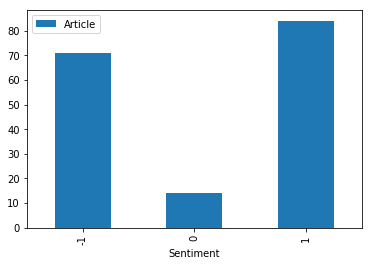

In [59]:
news.groupby('Sentiment').count()[['Article']].plot(kind='bar')

In [65]:
result.body

sentimentresult = {'text':[(result.body[i])['text'] for i in range(0,len(result.body))],
                   'external_id':[(result.body[i])['external_id'] for i in range(0,len(result.body))],
                   'error':[(result.body[i])['error'] for i in range(0,len(result.body))],
                   'tag_name':[((result.body[i])['classifications'][0])['tag_name'] for i in range(0,len(result.body))],
                   'tag_id':[((result.body[i])['classifications'][0])['tag_id'] for i in range(0,len(result.body))],
                   'confidence':[((result.body[i])['classifications'][0])['confidence'] for i in range(0,len(result.body))]}

sentimentresult = pd.DataFrame(data = sentimentresult)
cols = ['text', 'external_id', 'error', 'tag_name', 'tag_id', 'confidence']
sentimentresult = sentimentresult[cols]

sentimentresult.to_csv("sentimentresult.csv")

In [49]:
# Formalize the data format
date_df = news.groupby('Date').count()[['Article']]
date_df = date_df.reset_index()
date_df['Date'] = [datetime.datetime.strptime(date_df['Date'][i], '%b %d, %Y') for i in range(0,len(date_df))]
date_df['Date'] = [i.date() for i in date_df['Date']]
date_df.columns = ['Date','Count']

date_list = pd.DataFrame(pd.date_range(start='11-14-2017', end='08-30-2019', freq='D'))
date_list.columns = ['Date']
date_list['Date'] = [i.date() for i in date_list['Date']]

date_full = pd.merge(date_list, date_df, how='left', on='Date')
date_full = date_full.fillna(0)
date_full.to_csv('News_count.csv', header=True)